# Sound analysis of MusicLab 5

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import IPython.display as ipd

import librosa
import librosa.display

import matplotlib as mpl
# This is to fix an overflow problem
mpl.rcParams['agg.path.chunksize'] = 10000

In [2]:
%matplotlib inline

In [3]:
matplotlib.rcParams['agg.path.chunksize'] = 10000 #this is to avoid cell block limits

## Import audio files

If you have enough memory, you may be able to load both files at once. If not, load one at a time and only run the relevant analyses parts below. 

In [ ]:
a, sr = librosa.load('Khoparzi-Audio.wav')

In [3]:
b, sr = librosa.load('Renick_Bell.wav')

If you get into memory problems, you can either reduce the sampling rate (sr) or duration (or both).

In [4]:
a, sr = librosa.load('Khoparzi-Audio.wav', sr=11025, duration=60)

In [ ]:
b, sr = librosa.load('Renick_Bell.wav', sr=11025, duration=600)

It may be good to check what you have actually loaded.

In [ ]:
# Khoparzi
ipd.Audio(a, rate=sr)

In [ ]:
# Renick Bell
ipd.Audio(b, rate=sr)

## Amplitude plots

This is how you can plot amplitudes of both files in one plot. Will only work if you have loaded both files above.

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(2, 1, 1)
librosa.display.waveplot(a, sr=sr)
plt.title('Khoparzi')
plt.ylabel('Amplitude')
plt.gca().axes.get_xaxis().set_visible(False)

plt.subplot(2, 1, 2)
librosa.display.waveplot(b, sr=sr)
plt.title('Renick Bell')
plt.ylabel('Amplitude')
%plt.gca().axes.get_xaxis().set_visible(False)

plt.tight_layout()

plt.savefig('waveforms.png', dpi=200)
plt.show()

## Harmonic/percussive decomposition

In [ ]:
plt.figure(figsize=(10, 4))

a_harm, a_perc = librosa.effects.hpss(a)
plt.subplot(1,1,1)
librosa.display.waveplot(a_harm, sr=sr, alpha=0.25)
librosa.display.waveplot(a_perc, sr=sr, color='r', alpha=0.5)
plt.title('Harmonic/percussive waveform - Khoparzi')
plt.ylabel('Amplitude')

plt.savefig('amplitudes_harmonic_percussive-khoparzi.png', dpi=200)

plt.show()

In [ ]:
plt.figure(figsize=(10, 4))

b_harm, b_perc = librosa.effects.hpss(b)
plt.subplot(1,1,1)
librosa.display.waveplot(b_harm, sr=sr, alpha=0.25)
librosa.display.waveplot(b_perc, sr=sr, color='r', alpha=0.5)
plt.title('Harmonic/percussive waveform - Renick Bell')
plt.ylabel('Amplitude')

plt.savefig('amplitudes_harmonic_percussive-bell.png', dpi=200)

plt.show()

## Spectrogram

In [ ]:
D = librosa.stft(a)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

fig, ax = plt.subplots(figsize=(10, 4))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Spectrogram - Khoparzi')
fig.colorbar(img, ax=ax, format="%+2.f dB")

plt.savefig('spectrogram_khoparzi.png', dpi=200)

In [ ]:
D = librosa.stft(b)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

fig, ax = plt.subplots(figsize=(10, 4))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Spectrogram - Renick Bell')
fig.colorbar(img, ax=ax, format="%+2.f dB")

plt.savefig('spectrogram_bell.png', dpi=200)

## Mel spectrogram

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
M = librosa.feature.melspectrogram(y=a, sr=sr)
M_db = librosa.power_to_db(M, ref=np.max)
img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel Spectrogram - Khoparzi')
fig.colorbar(img, ax=ax, format="%+2.f dB")

plt.savefig('mel-spectrogram-khoparzi.png', dpi=200)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
M = librosa.feature.melspectrogram(y=b, sr=sr)
M_db = librosa.power_to_db(M, ref=np.max)
img = librosa.display.specshow(M_db, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel Spectrogram - Renick Bell')
fig.colorbar(img, ax=ax, format="%+2.f dB")

plt.savefig('mel-spectrogram-bell.png', dpi=200)

## Chromagram

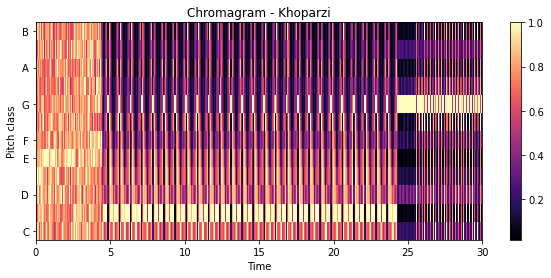

In [5]:
chroma = librosa.feature.chroma_cqt(y=a, sr=sr)
fig, ax = plt.subplots(figsize=(10, 4))
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
ax.set(title='Chromagram - Khoparzi')
fig.colorbar(img, ax=ax)

plt.savefig('chromagram-khoparzi.png', dpi=200)

In [ ]:
chroma = librosa.feature.chroma_cqt(y=b, sr=sr)
fig, ax = plt.subplots(figsize=(10, 4))
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
ax.set(title='Chromagram - Renick Bell')
fig.colorbar(img, ax=ax)

plt.savefig('chromagram-bell.png', dpi=200)

## Self-similarity matrix

This will only work if you have already run the chroma analysis above.

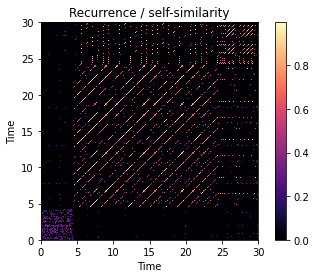

In [6]:
R = librosa.segment.recurrence_matrix(chroma, mode='affinity')
fig, ax = plt.subplots()
img = librosa.display.specshow(R, y_axis='time', x_axis='time', ax=ax)
ax.set(title='Recurrence / self-similarity')
fig.colorbar(img, ax=ax)

plt.savefig('self-similarity.png', dpi=200)